# Import packages

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore") # ignore warnings

# Load Data

In [3]:
# load and preview data
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
# print positive/negative labels
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [6]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

# Split train-test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Building LightGBM model

In [53]:
# build the lightgbm model
model = lgb.LGBMClassifier()
lgb_params = {
    'boosting_type': ['gbdt'],
    'objective': ['binary'],
    'num_leaves': [5, 30],
    'learning_rate': [0.01],
    'reg_alpha':[0, 0.1, 0.3],
    'reg_lambda':[0, 0.1, 0.3]
}

grid_cv = GridSearchCV(model, lgb_params, cv = 3, verbose = 1)
grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt'], 'learning_rate': [0.01],
                         'num_leaves': [5, 30], 'objective': ['binary'],
                         'reg_alpha': [0, 0.1, 0.3],
                         'reg_lambda': [0, 0.1, 0.3]},
             verbose=1)

In [54]:
print(grid_cv.best_params_)

{'boosting_type': 'gbdt', 'learning_rate': 0.01, 'num_leaves': 5, 'objective': 'binary', 'reg_alpha': 0.3, 'reg_lambda': 0}


In [55]:
# define categorical variables
# build the lightgbm model
best_params = grid_cv.best_params_
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)
bst = lgb.train(best_params, lgb_train, 1000, valid_sets=lgb_test, early_stopping_rounds=20)

[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[1]	valid_0's binary_logloss: 0.651027
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.64403
[3]	valid_0's binary_logloss: 0.637189
[4]	valid_0's binary_logloss: 0.630498
[5]	valid_0's binary_logloss: 0.623953
[6]	valid_0's binary_logloss: 0.61755
[7]	valid_0's binary_logloss: 0.611282
[8]	valid_0's binary_logloss: 0.605147
[9]	valid_0's binary_logloss: 0.599141
[10]	valid_0's binary_logloss: 0.593259
[11]	valid_0's binary_logloss: 0.587497
[12]	valid_0's binary_l

[307]	valid_0's binary_logloss: 0.193991
[308]	valid_0's binary_logloss: 0.193612
[309]	valid_0's binary_logloss: 0.193391
[310]	valid_0's binary_logloss: 0.193169
[311]	valid_0's binary_logloss: 0.192987
[312]	valid_0's binary_logloss: 0.192691
[313]	valid_0's binary_logloss: 0.192478
[314]	valid_0's binary_logloss: 0.192266
[315]	valid_0's binary_logloss: 0.192123
[316]	valid_0's binary_logloss: 0.191912
[317]	valid_0's binary_logloss: 0.191742
[318]	valid_0's binary_logloss: 0.191541
[319]	valid_0's binary_logloss: 0.191361
[320]	valid_0's binary_logloss: 0.191006
[321]	valid_0's binary_logloss: 0.190721
[322]	valid_0's binary_logloss: 0.190522
[323]	valid_0's binary_logloss: 0.190326
[324]	valid_0's binary_logloss: 0.19013
[325]	valid_0's binary_logloss: 0.189938
[326]	valid_0's binary_logloss: 0.189887
[327]	valid_0's binary_logloss: 0.189629
[328]	valid_0's binary_logloss: 0.189359
[329]	valid_0's binary_logloss: 0.189172
[330]	valid_0's binary_logloss: 0.188883
[331]	valid_0's b

[601]	valid_0's binary_logloss: 0.169808
[602]	valid_0's binary_logloss: 0.169787
[603]	valid_0's binary_logloss: 0.169734
[604]	valid_0's binary_logloss: 0.169777
[605]	valid_0's binary_logloss: 0.169849
[606]	valid_0's binary_logloss: 0.169837
[607]	valid_0's binary_logloss: 0.169785
[608]	valid_0's binary_logloss: 0.169771
[609]	valid_0's binary_logloss: 0.169757
[610]	valid_0's binary_logloss: 0.169677
[611]	valid_0's binary_logloss: 0.169721
[612]	valid_0's binary_logloss: 0.169743
[613]	valid_0's binary_logloss: 0.169692
[614]	valid_0's binary_logloss: 0.169614
[615]	valid_0's binary_logloss: 0.169626
[616]	valid_0's binary_logloss: 0.169616
[617]	valid_0's binary_logloss: 0.169727
[618]	valid_0's binary_logloss: 0.169678
[619]	valid_0's binary_logloss: 0.169602
[620]	valid_0's binary_logloss: 0.169594
[621]	valid_0's binary_logloss: 0.169705
[622]	valid_0's binary_logloss: 0.169658
[623]	valid_0's binary_logloss: 0.169566
[624]	valid_0's binary_logloss: 0.16958
[625]	valid_0's b

Text(0.5, 1.0, 'Feature importances')

<Figure size 864x432 with 0 Axes>

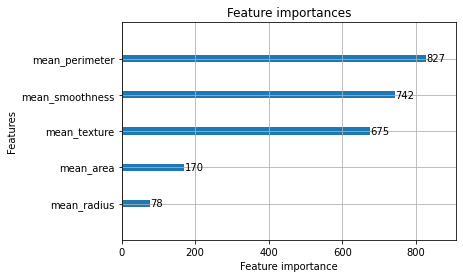

In [56]:
plt.figure(figsize=(12,6))
lgb.plot_importance(bst, max_num_features=30)
plt.title("Feature importances")

In [57]:
y_pred = bst.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

y_pred_train = bst.predict(X_train)
y_pred_train = np.where(y_pred_train > 0.5, 1, 0)

In [58]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(accuracy_score(y_train, y_pred_train)))
print('Test set score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Training set score: 0.9749
Test set score: 0.9240


In [52]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 55   8]
 [  4 104]]

True Positives(TP) =  55

True Negatives(TN) =  104

False Positives(FP) =  8

False Negatives(FN) =  4


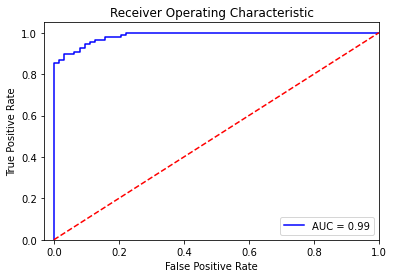

In [45]:
# calculate the fpr and tpr for all thresholds of the classification
probs = bst.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()